# Find distribution of local maxima in a Gaussian Random Field

## Apply formula of Cheng&Schwartzman 

1. Below I defined the formulae of Cheng&Schwartzman in arXiv:1503.01328v1.  On page 3.3 the density functions are displayed for 1D, 2D and 3D. 
2. Consequently, I apply these formulae to a range of x-values, which should enable us to reproduce Figure 1.  This however does not succeed for 3D!

In [17]:
% matplotlib inline
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt


In [190]:
def peakdens1D(x,k):
    f1 = (3-k**2)**(0.5)/(6*math.pi)**0.5 * np.exp(-3*x**2/(2*(3-k**2)))
    f2 = 2*k*x*math.pi**0.5/6**0.5*stats.norm.pdf(x)*stats.norm.cdf(k*x/(3-k**2)**0.5)
    out = f1+f2
    return out

def peakdens2D(x,k):
    f1 = 3**0.5*k**2*(x**2-1)*stats.norm.pdf(x)*stats.norm.cdf(k*x/(2-k**2)**0.5)
    f2 = k*x*(3*(2-k**2))**0.5/(2*math.pi) * np.exp(-x**2/(2-k**2))
    f3 = 6**0.5/(math.pi*(3-k**2))**0.5 * np.exp(-3*x**2/(2*(3-k**2)))
    f4 = stats.norm.cdf(k*x/((3-k**2)*(2-k**2))**0.5)
    out = f1 + f2 + f3*f4
    return out

def lemma23(x,a,b):
    f1  = (1/a + 2*b**2 -1 ) * (1/(2*a)**0.5) * stats.norm.cdf(b*(2*a)**0.5/(a+1)**0.5)
    f2 = b*(a+1)**0.5/((2*math.pi)**0.5*a) * np.exp(-a*b**2/(a+1))
    f3 = 2**0.5/(2*a+1)**0.5 * np.exp(-a*b**2/(2*a+1)) * stats.norm.cdf(2**0.5*a*b/((2*a+1)*(a+1))**0.5)
    out = f1+f2+f3
    return out

def peakdens3D(x,k):
    f1 = 144*stats.norm.pdf(x)/(29*6**(0.5)-36)
    f211 = k**2.*((1.-k**2.)**3. + 6.*(1.-k**2.)**2. + 12.*(1.-k**2.)+24.)*x**2. / (4.*(3.-k**2.)**2.)
    f212 = (2.*(1.-k**2.)**3. + 3.*(1.-k**2.)**2.+6.*(1.-k**2.)) / (4.*(3.-k**2.))
    f213 = 3./2.
    f21 = (f211 + f212 + f213)
    f22 = np.exp(-k**2.*x**2./(2.*(3.-k**2.))) / (2.*(3.-k**2.))**(0.5) 
    f23 = stats.norm.cdf(2.*k*x / ((3.-k**2.)*(5.-3.*k**2.))**(0.5))
    f2 = f21*f22*f23
    f31 = (k**2.*(2.-k**2.))/4.*x**2. - k**2.*(1.-k**2.)/2. - 1.
    f32 = np.exp(-k**2.*x**2./(2.*(2.-k**2.))) / (2.*(2.-k**2.))**(0.5) 
    f33 = stats.norm.cdf(k*x / ((2.-k**2.)*(5.-3.*k**2.))**(0.5))
    f3 = f31 * f32 * f33
    f41 = 7.-k**2. + (1.-k**2.)*(3.*(1.-k**2.)**2. + 12.*(1.-k**2.) + 28.)/(2.*(3.-k**2.))
    f42 = k*x*np.exp(-3.*k**2.*x**2/(2.*(5-3.*k**2.))) / (4.*math.pi**(0.5)*(3.-k**2.)*(5.-3.*k**2.)*(0.5))
    f4 = f41*f42
    f51 = math.pi*(0.5)*k**3./4.*x*(x**2.-3.)
    f521low = np.array([-10.,-10.])
    f521up = np.array([0.,k*x/2.**(0.5)])
    f521mu = np.array([0.,0.])
    f521sigma = np.array([[3./2., -1.],[-1.,(3.-k**2.)/2.]])
    f521,i = stats.mvn.mvnun(f521low,f521up,f521mu,f521sigma) 
    f522low = np.array([-10.,-10.])
    f522up = np.array([0.,k*x/2.*(0.5)])
    f522mu = np.array([0.,0.])
    f522sigma = np.array([[3./2., -1./2.],[-1./2.,(2.-k**2.)/2.]])
    f522,i = stats.mvn.mvnun(f522low,f522up,f522mu,f522sigma) 
    f5 = f51*(f521+f522)
    out = f1*(f2+f3+f4+f5)
    return out

def lemma24(x,a,b):
    f111 = (24.*a**3.+ 12.*a**2. + 6.*a + 1.)/(2.*a*(2.*a + 1.)**2.)*b**2.
    f112 = (6.*a**2. + 3.*a + 2.)/(4.*a**2.*(2.*a+1.))
    f113 = (3./2.)
    f11 = f111+f112+f113
    f12 = 1./(2.*(2.*a+1.))**0.5*np.exp(-a*b**2./(2.*a+1.))
    f13 = stats.norm.cdf(2.*2.**0.5*a*b/((2.*a+1.)*(2.*a+3.))**0.5)
    f1 = f11*f12*f13
    f21 = (a+1.)/(2.*a)*b**2. + (1.-a)/(2.*a**2.) - 1.
    f22 = 1./(2.*(a+1.))**0.5*np.exp(-a*b**2./(a+1.))
    f23 = stats.norm.cdf(2.**0.5*a*b/((a+1.)*(2.*a+3.))**0.5)
    f2 = f21*f22*f23
    f31 = (6.*a+1.+(28.*a**2.+12.*a+3.)/(2.*a*(2.*a+1.)))
    f32 = b/(2.*(2.*math.pi)**0.5*(2.*a+1.)*(2.*a+3.)**0.5)
    f33 = np.exp(-3.*a*b**2./(2.*a+3.))
    f3 = f31*f32*f33
    f41 = (b**2.+3.*(1.-a)/(2.*a))
    f42 = math.pi**0.5*b/(2.*a)**0.5
    f431low = np.array([-10.,-10.])
    f431up = np.array([0.,b])
    f431mu = np.array([0.,0.])
    f431sigma = np.array([[3./2., -1./2.],[-1./2.,(1.+a)/(2.*a)]])
    f431,i = stats.mvn.mvnun(f431low,f431up,f431mu,f431sigma)
    f432low = np.array([-10.,-10.])
    f432up = np.array([0.,b])
    f432mu = np.array([0.,0.])
    f432sigma = np.array([[3./2., -1.],[-1.,(1.+2.*a)/(2.*a)]])
    f432,i = stats.mvn.mvnun(f431low,f431up,f431mu,f431sigma)
    f43 = f431+f432
    f4 = f41*f42*f43
    out = f1 + f2 + f3 + f4
    return out
    
    

In [191]:
xs = np.arange(-4,4,0.01).tolist()
ys_3d_k01 = []
ys_3d_k05 = []
ys_3d_k1 = []
ys_2d_k01 = []
ys_2d_k05 = []
ys_2d_k1 = []
ys_1d_k01 = []
ys_1d_k05 = []
ys_1d_k1 = []


for x in xs:
    ys_1d_k01.append(peakdens1D(x,0.1))
    ys_1d_k05.append(peakdens1D(x,0.5))
    ys_1d_k1.append(peakdens1D(x,1))
    ys_2d_k01.append(peakdens2D(x,0.1))
    ys_2d_k05.append(peakdens2D(x,0.5))
    ys_2d_k1.append(peakdens2D(x,1))
    ys_3d_k01.append(peakdens3D(x,0.1))
    ys_3d_k05.append(peakdens3D(x,0.5))
    ys_3d_k1.append(peakdens3D(x,1))


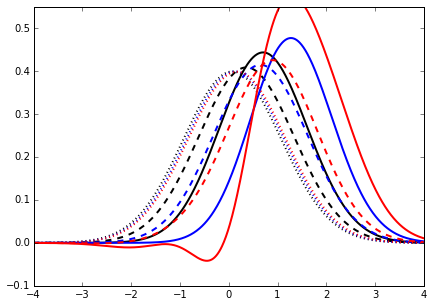

In [192]:
plt.figure(figsize=(7,5))
plt.plot(xs,ys_1d_k01,color="black",ls=":",lw=2)
plt.plot(xs,ys_1d_k05,color="black",ls="--",lw=2)
plt.plot(xs,ys_1d_k1,color="black",ls="-",lw=2)
plt.plot(xs,ys_2d_k01,color="blue",ls=":",lw=2)
plt.plot(xs,ys_2d_k05,color="blue",ls="--",lw=2)
plt.plot(xs,ys_2d_k1,color="blue",ls="-",lw=2)
plt.plot(xs,ys_3d_k01,color="red",ls=":",lw=2)
plt.plot(xs,ys_3d_k05,color="red",ls="--",lw=2)
plt.plot(xs,ys_3d_k1,color="red",ls="-",lw=2)
plt.ylim([-0.1,0.55])
plt.show()

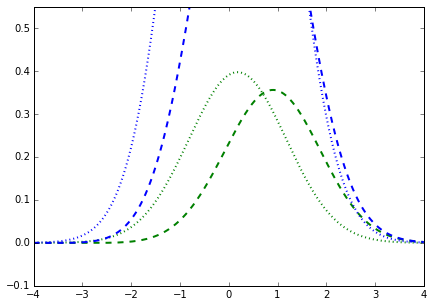

In [124]:
xs = np.arange(-4,4,0.01).tolist()
ys_3d_k01b = []
ys_3d_k05b = []
ys_3d_k1b = []
ys_3d_k01 = []
ys_3d_k05 = []
ys_3d_k1 = []

for x in xs:
    k = 0.1
    a1 = (1.-k**2.)**(-1.)
    b1 = k*x/2.**0.5
    ys_3d_k01b.append(lemma24(x,a1,b1))
    k = 0.5
    a2 = (1-k**2.)**(-1.)
    b2 = k*x/2.**0.5
    ys_3d_k05b.append(lemma24(x,a2,b2))
    ys_3d_k01.append(peakdens3D(x,0.1))
    ys_3d_k05.append(peakdens3D(x,0.5))
    ys_3d_k1.append(peakdens3D(x,1))

plt.figure(figsize=(7,5))
plt.plot(xs,ys_3d_k01b,color="green",ls=":",lw=2)
plt.plot(xs,ys_3d_k05b,color="green",ls="--",lw=2)
plt.plot(xs,ys_3d_k01,color="blue",ls=":",lw=2)
plt.plot(xs,ys_3d_k05,color="blue",ls="--",lw=2)
plt.ylim([-0.1,0.55])
plt.show()

In [87]:
2.**(-1.)

0.5

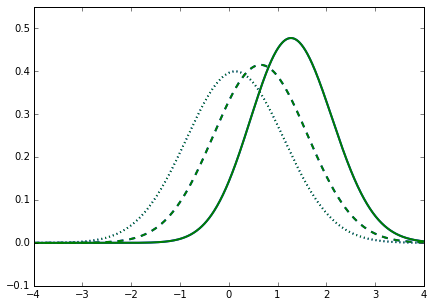

In [95]:
xs = np.arange(-4,4,0.01).tolist()
ys_2d_k01 = []
ys_2d_k05 = []
ys_2d_k1 = []
ys_2d_k01b = []
ys_2d_k05b = []
ys_2d_k1b = []


for x in xs:
    ys_2d_k01.append(peakdens2D(x,0.1))
    ys_2d_k05.append(peakdens2D(x,0.5))
    ys_2d_k1.append(peakdens2D(x,1))
    k = 0.1
    a1 = (1.-k**2.)**(-1.)
    b1 = k*x/2.**0.5
    ys_2d_k01b.append(lemma23(x,a1,b1))
    k = 0.5
    a2 = (1-k**2.)**(-1.)
    b2 = k*x/2.**0.5
    ys_2d_k05b.append(lemma23(x,a2,b2))
    a3 = (1-0.99999999**2.)**(-1)
    b3 = 0.99999999*x/2.**0.5
    ys_2d_k1b.append(lemma23(x,a3,b3))

plt.figure(figsize=(7,5))
plt.plot(xs,ys_2d_k01,color="blue",ls=":",lw=2)
plt.plot(xs,ys_2d_k05,color="blue",ls="--",lw=2)
plt.plot(xs,ys_2d_k1,color="blue",ls="-",lw=2)
plt.plot(xs,ys_2d_k01,color="green",ls=":",lw=2)
plt.plot(xs,ys_2d_k05,color="green",ls="--",lw=2)
plt.plot(xs,ys_2d_k1,color="green",ls="-",lw=2)
plt.ylim([-0.1,0.55])
plt.show()

In [220]:
x = 2
k = 0.5
a = (1.-k**2.)**(-1.)
b = k*x/2.**0.5

fd1 = 144*stats.norm.pdf(x)/(29*6**(0.5)-36)
fd211 = k**2.*((1.-k**2.)**3. + 6.*(1.-k**2.)**2. + 12.*(1.-k**2.)+24.)*x**2. / (4.*(3.-k**2.)**2.)
fd212 = (2.*(1.-k**2.)**3. + 3.*(1.-k**2.)**2.+6.*(1.-k**2.)) / (4.*(3.-k**2.))
fd213 = 3./2.
fd21 = (fd211 + fd212 + fd213)
fd22 = np.exp(-k**2.*x**2./(2.*(3.-k**2.))) / (2.*(3.-k**2.))**(0.5) 
fd23 = stats.norm.cdf(2.*k*x / ((3.-k**2.)*(5.-3.*k**2.))**(0.5))
fd2 = fd21*fd22*fd23
print fd22
fd31 = (k**2.*(2.-k**2.))/4.*x**2. - k**2.*(1.-k**2.)/2. - 1.
fd32 = np.exp(-k**2.*x**2./(2.*(2.-k**2.))) / (2.*(2.-k**2.))**(0.5) 
fd33 = stats.norm.cdf(k*x / ((2.-k**2.)*(5.-3.*k**2.))**(0.5))
fd3 = fd31 * fd32 * fd33
fd41 = 7.-k**2. + (1.-k**2.)*(3.*(1.-k**2.)**2. + 12.*(1.-k**2.) + 28.)/(2.*(3.-k**2.))
fd42 = k*x*np.exp(-3.*k**2.*x**2/(2.*(5-3.*k**2.))) / (4.*math.pi**(0.5)*(3.-k**2.)*(5.-3.*k**2.)*(0.5))
fd4 = fd41*fd42
fd51 = math.pi*(0.5)*k**3./4.*x*(x**2.-3.)
f521low = np.array([-10.,-10.])
f521up = np.array([0.,k*x/2.**(0.5)])
f521mu = np.array([0.,0.])
f521sigma = np.array([[3./2., -1.],[-1.,(3.-k**2.)/2.]])
fd521,i = stats.mvn.mvnun(f521low,f521up,f521mu,f521sigma) 
f522low = np.array([-10.,-10.])
f522up = np.array([0.,k*x/2.*(0.5)])
f522mu = np.array([0.,0.])
f522sigma = np.array([[3./2., -1./2.],[-1./2.,(2.-k**2.)/2.]])
fd522,i = stats.mvn.mvnun(f522low,f522up,f522mu,f522sigma) 
fd5 = fd51*(fd521+fd522)
out = fd1*(fd2+fd3+fd4+fd5)

    

0.355513438794
0.720732172768
0.859813027289


In [219]:
fc1 = 144*stats.norm.pdf(x)/(29*6**(0.5)-36)
fc211 = (24.*a**3.+ 12.*a**2. + 6.*a + 1.)/(2.*a*(2.*a + 1.)**2.)*b**2.
fc212 = (6.*a**2. + 3.*a + 2.)/(4.*a**2.*(2.*a+1.))
fc213 = (3./2.)
fc21 = (fc211+fc212+fc213)
fc22 = 1./(2.*(2.*a+1.))**0.5*np.exp(-a*b**2./(2.*a+1.))
fc23 = stats.norm.cdf(2.*2.**0.5*a*b/((2.*a+1.)*(2.*a+3.))**0.5)
fc2 = fc21*fc22*fc23
print fc22
fc31 = (a+1.)/(2.*a)*b**2. + (1.-a)/(2.*a**2.) - 1.
fc32 = 1./(2.*(a+1.))**0.5*np.exp(-a*b**2./(a+1.))
fc33 = stats.norm.cdf(2.**0.5*a*b/((a+1.)*(2.*a+3.))**0.5)
fc3 = fc31*fc32*fc33
fc41 = (6.*a+1.+(28.*a**2.+12.*a+3.)/(2.*a*(2.*a+1.)))
fc42 = b/(2.*(2.*math.pi)**0.5*(2.*a+1.)*(2.*a+3.)**0.5)
fc43 = np.exp(-3.*a*b**2./(2.*a+3.))
fc4 = fc41*fc42*fc43
fc51 = (b**2.+3.*(1.-a)/(2.*a))
fc52 = math.pi**0.5*b/(2.*a)**0.5
f531low = np.array([-10.,-10.])
f531up = np.array([0.,b])
f531mu = np.array([0.,0.])
f531sigma = np.array([[3./2., -1./2.],[-1./2.,(1.+a)/(2.*a)]])
fc531,i = stats.mvn.mvnun(f531low,f531up,f531mu,f531sigma)
f532low = np.array([-10.,-10.])
f532up = np.array([0.,b])
f532mu = np.array([0.,0.])
f532sigma = np.array([[3./2., -1.],[-1.,(1.+2.*a)/(2.*a)]])
fc532,i = stats.mvn.mvnun(f531low,f531up,f531mu,f531sigma)
fc53 = fc531+fc532
fc5 = fc51*fc52*fc53
out = fc1*(fc2 + fc3 + fc4+fc5)

0.307883669383
0.720732172768
0.744619924137


In [181]:
fd212/fc212

4.6000000000000005

In [ ]:
k = 2
print 2.*(1.-k**2.)**3. + 3.*(1.-k**2.)**2.+6.*(1.-k**2.)


In [223]:
fc22 = 1./(2.*(2.*a+1.))**0.5*np.exp(-a*b**2./(2.*a+1.))
fd22 = np.exp(-k**2.*x**2./(2.*(3.-k**2.))) / (2.*(3.-k**2.))**(0.5) 


print fc22
print fd22

0.307883669383
0.355513438794


In [226]:
print (2.*(2.*a+1.))
print (2.*(3.-k**2.))**(0.5) 

2.44444444444
2.34520787991
